In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

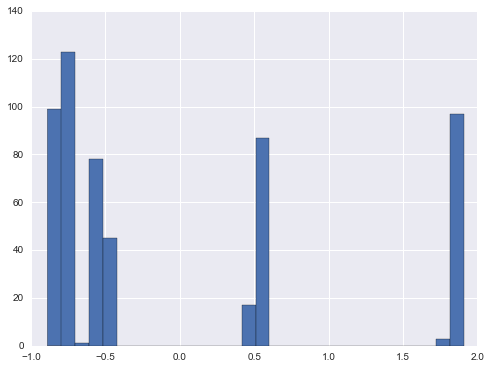

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import seaborn as sns
from theano import tensor as T

blue = sns.color_palette()[0]

np.random.seed(462233) # from random.org

N = 550

CENTROIDS = np.array([0, 10, 50, 100])
WEIGHTS = np.array([0.4, 0.2, 0.2, 0.2])

x = np.random.normal(CENTROIDS[np.random.choice(len(CENTROIDS), size=N, p=WEIGHTS)], size=N)
x_std = (x - x.mean()) / x.std()

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x_std, bins=30);

In [16]:
?pm.Gamma

In [11]:
K = 30

with pm.Model() as model:
    alpha = pm.Gamma('alpha', 1., 1.)
    beta = pm.Beta('beta', 1., alpha, shape=K)
    w = pm.Deterministic('w', beta * T.concatenate([[1], T.extra_ops.cumprod(1 - beta)[:-1]]))

    tau = pm.Gamma('tau', 1., 1., shape=K)
    lambda_ = pm.Uniform('lambda', 0, 5, shape=K)
    mu = pm.Normal('mu', 0, tau=lambda_ * tau, shape=K)
    obs = pm.NormalMixture('obs', w, mu, tau=lambda_ * tau,
                           observed=x_std)

with model:
    trace = pm.sample(2000, n_init=100000)

100%|██████████| 2000/2000 [01:31<00:00, 21.94it/s] 


In [13]:
trace['w'].mean(axis=0)

array([  6.28564033e-01,   1.88279597e-01,   1.83147186e-01,
         7.29274071e-06,   1.29414233e-06,   3.57754084e-07,
         1.53818324e-07,   4.26885355e-08,   3.83676923e-08,
         3.78683061e-09,   7.89995615e-10,   3.12089990e-10,
         3.50827505e-11,   9.27475791e-12,   4.80347545e-12,
         3.76285852e-12,   3.47705605e-13,   1.79212043e-13,
         2.91891542e-13,   1.33886105e-14,   7.61172219e-15,
         2.65638750e-15,   1.10293629e-15,   9.52430611e-16,
         1.52152408e-16,   1.05135770e-15,   3.70526136e-17,
         2.19385569e-17,   2.04772144e-17,   1.18657040e-17])

In [14]:
np.arange(K) - 0.4

array([ -0.4,   0.6,   1.6,   2.6,   3.6,   4.6,   5.6,   6.6,   7.6,
         8.6,   9.6,  10.6,  11.6,  12.6,  13.6,  14.6,  15.6,  16.6,
        17.6,  18.6,  19.6,  20.6,  21.6,  22.6,  23.6,  24.6,  25.6,
        26.6,  27.6,  28.6])

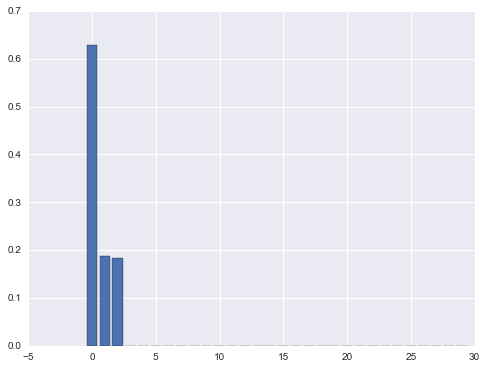

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(np.arange(K) - 0.4, trace['w'].mean(axis=0));